# Linked Lists

## Contents:

1. [Introduction](#introduction)
2. [Types of Linked Lists](#types-of-linked-lists)
    - [**Singly Linked List**: Each node contains only one reference to the next node.](#singly-linked-list)
        - [Implementation](#implementation)
        - [Operations](#operations)
        - [Applications](#applications)
        - [Problems](#problems)
    - [**Doubly Linked List**: Each node contains two references, one to the next node and another to the previous node.](#doubly-linked-list)
        - [Implementation](#implementation-1)
        - [Operations](#operations-1)
        - [Applications](#applications-1)
        - [Problems](#problems-1)
    - [**Circular Linked List**: Last node of the list contains a reference to the first node of the list.](#circular-linked-list)
        - [Implementation](#implementation-2)
        - [Operations](#operations-2)
        - [Applications](#applications-2)
        - [Problems](#problems-2)

## Introduction

A linked list is a linear data structure where each element is a separate object. Each element (we will call it a node) of a list is comprising of two items - the data and a reference to the next/previous node. The entry point into a linked list is called the head of the list. It should be noted that the head is not a separate node, but the reference to the first node.


## Singly Linked List

A singly linked list is a collection of nodes where each node has two parts: data and a reference to the next node. The first node is called the head and the last node is called the tail. The last node has a reference to `None`. If the list is empty then the head is a `None` reference. 

### Implementation

In [2]:
class LinkedList:
    def __init__(self, data) -> None:
        self.data = data
        self.next = None

    def __repr__(self) -> str:
        return f"LL({self.data})"

### Operations

1. **Traversal**:
    - Traverse the list, print all the elements.
2. **Insertion**:
    - Insert at the beginning of the list.
    - Insert at the end of the list.
    - Insert at the given position.
3. **Deletion**:
    - Delete the first node.
    - Delete the last node.
    - Delete the node at the given position.
4. **Search**:
    - Search for a given element in the list.
5. **Length**:
    - Find the length of the list.

#### 1. Traversal

In [3]:
# Utility function to print linked list
%matplotlib inline
from graphviz import Digraph

# print linked list inline in notebook using graphviz
def print_linked_list(head):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    node = head
    i = 0
    while node:
        dot.node(name=str(i), label= "{data %.2f | next %s}" % (node.data, node.next), shape='record')
        if node.next:
            dot.edge(f'{i}', f'{i+1}')
        i += 1
        node = node.next

    display(dot)


2 3 4 

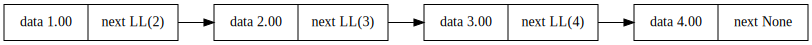

In [4]:
head = LinkedList(1)
cur = head
for i in range(2, 5):
    cur.next = LinkedList(i)
    cur = cur.next
    print(cur.data, end=" ")
print_linked_list(head)

### 2. Insertion

#### 2.1 Insertion at the beginning

In [5]:
def insert_at_start(head, data) -> LinkedList:
    new_node = LinkedList(data)
    new_node.next = head
    head = new_node
    return head


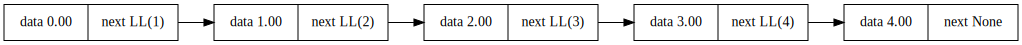

In [6]:
head = insert_at_start(head, 0)
print_linked_list(head)

#### 2.2 Insertion at the end

In [7]:
def insert_at_end(head, data) -> LinkedList:
    new_node = LinkedList(data)
    if head is None:
        return new_node
    cur = head
    while cur.next:
        cur = cur.next
    cur.next = new_node
    return head

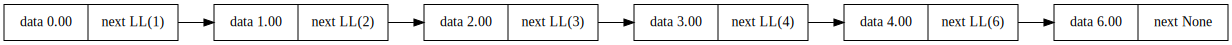

In [8]:
head = insert_at_end(head, 6)
print_linked_list(head)

#### 2.3 Insertion at the given position

In [9]:
def insert_at_idx(head, idx, data) -> LinkedList:
    if idx < 1:
        print(f"Invalid index {idx}.")
    cur = head
    pos = 1
    while cur.next.next:
        # print(cur)
        cur = cur.next
        pos += 1
        if pos == idx -1:
            break
    print(pos, cur, idx)
    if pos < idx - 1:
        print(f"Index {idx} out of range for list size {pos}.")
        return head
    
    new_node = LinkedList(data)
    new_node.next = cur.next
    cur.next = new_node

    
    return head



    

5 LL(4) 6


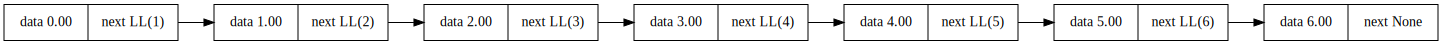

In [10]:
head = insert_at_idx(head, 6, 5)
print_linked_list(head)

### 3. Deletion

#### 3.1 Delete the first node

In [11]:
def delete_first_node(head):
    new_head = head.next
    del head
    return new_head
    

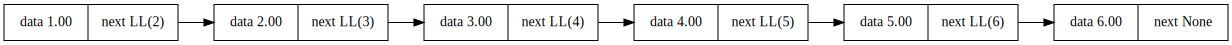

In [12]:
head = delete_first_node(head)
print_linked_list(head)

#### 3.2 Delete the last node

In [13]:
def delete_last_node(head):
    cur = head
    while cur.next.next:
        cur = cur.next
    del cur.next
    cur.next = None
    return head

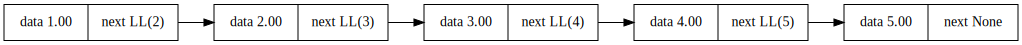

In [14]:
head = delete_last_node(head)
print_linked_list(head)

#### 3.3 Delete the node at the given position

In [15]:
def delete_idx_node(head, idx):
    if idx < 1:
        print(f"Invalid index {idx}.")
    if head.next == None:
        del head
        return None
    if idx == 1:
        return delete_first_node(head)
    cur = head
    pos = 1
    while cur.next.next:
        if pos >= idx -1:
            break
        cur = cur.next
        pos += 1
    print(pos, cur, idx)
    if pos < idx - 1:
        print(f"Index {idx} out of range for list size {pos}.")
        return head
    
    cur.next = cur.next.next
    
    return head


2 3 4 

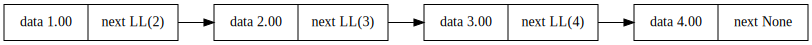

In [16]:
head = LinkedList(1)
cur = head
for i in range(2, 5):
    cur.next = LinkedList(i)
    cur = cur.next
    print(cur.data, end=" ")
print_linked_list(head)

3 LL(3) 4


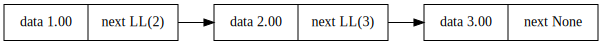

In [17]:
head = delete_idx_node(head, 4)
print_linked_list(head)

### 4. Search

In [18]:
def search_list(head, target) -> bool:
    while head:
        if head.data == target:
            return True
        head = head.next
    return False

4 6 8 

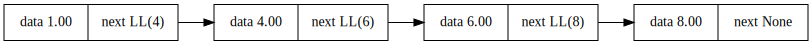

3 Not Found In the Given List.
8 Found In the Given List.


In [24]:
head = LinkedList(1)
cur = head
for i in range(2, 5):
    cur.next = LinkedList(i*2)
    cur = cur.next
    print(cur.data, end=" ")
print_linked_list(head)
print(f"{3} {'Found' if search_list(head, 3) else 'Not Found'} In the Given List.")
print(f"{8} {'Found' if search_list(head, 4) else 'Not Found'} In the Given List.")

### 5. Length

In [25]:
def list_len(head) -> int:
    length = 0
    while head:
        head = head.next
        length += 1
    return length

2 3 

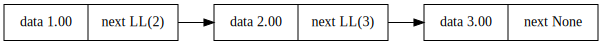

Length of the list is: 3
Length of the list is: 0


In [34]:
head = LinkedList(1)
cur = head
for i in range(2, 4):
    cur.next = LinkedList(i)
    cur = cur.next
    print(cur.data, end=" ")
print_linked_list(head)
print(f"Length of the list is: {list_len(head)}")
print(f"Length of the list is: {list_len(None)}")

### Applications

1. **Dynamic Memory Allocation**: The dynamic memory allocation is easier in linked list as the memory can be allocated or deallocated at runtime.
2. **Implementation of Stacks and Queues**: Linked list can be used to implement stacks and queues.
3. **Undo Functionality**: Undo functionality in Photoshop or Word can be implemented using linked list.
4. **Music Player**: Songs in a music player can be stored using linked list.


### Problems

1. [Reverse a linked list](https://leetcode.com/problems/reverse-linked-list/)
2. [Detect a cycle in a linked list](https://leetcode.com/problems/linked-list-cycle/)
3. [Merge two sorted linked lists](https://leetcode.com/problems/merge-two-sorted-lists/)
4. [Remove Nth node from the end of a linked list](https://leetcode.com/problems/remove-nth-node-from-end-of-list/)
5. [Rotate a linked list](https://leetcode.com/problems/rotate-list/)

## Doubly Linked List

A doubly linked list is a collection of nodes where each node has two parts: data and two references. The first reference points to the previous node and the second reference points to the next node. The first node is called the head and the last node is called the tail. The head has a reference to `None` in the previous part and the tail has a reference to `None` in the next part. If the list is empty then the head is a `None` reference.

### Implementation

In [35]:
class DLinkedList:
    def __init__(self, data) -> None:
        self.data = data
        self.next = None
        self.prev = None

    def __repr__(self) -> str:
        return f"DLL({self.data})"

In [59]:
# print doubly linked list inline in notebook using graphviz
def print_forward_dlinked_list(head):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    node = head
    i = 0
    while node:
        dot.node(name=str(i), label= "{ prev %s | data %.2f | next %s}" % (node.prev, node.data, node.next), shape='record')
        if node.next:
            dot.edge(f'{i}', f'{i+1}')
        i += 1
        node = node.next

    display(dot)

In [60]:
# print doubly linked list inline in notebook using graphviz
def print_bacward_dlinked_list(tail):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    node = tail
    i = 0
    while node:
        dot.node(name=str(i), label= "{ prev %s | data %.2f | next %s}" % (node.prev, node.data, node.next), shape='record')
        if node.prev:
            dot.edge(f'{i}', f'{i+1}')
        i += 1
        node = node.prev

    display(dot)

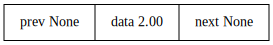

In [61]:
head = DLinkedList(2)
print_forward_dlinked_list(head)

### Operations

1. **Traversal**:
    - **Forward Traversal**: Traverse the list from the head to the tail.
    - **Backward Traversal**: Traverse the list from the tail to the head.
2. **Insertion**:
    - Insert at the beginning of the list.
    - Insert at the end of the list.
    - Insert at the given position.
3. **Deletion**:
    - Delete the first node.
    - Delete the last node.
    - Delete the node at the given position.
4. **Search**:
    - Search for a given element in the list.
5. **Length**:
    - Find the length of the list.

#### 1. Traversal

1.1. **Forward Traversal**

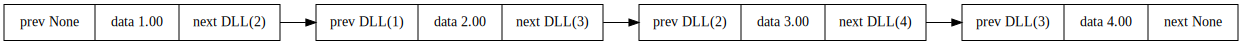

In [62]:
head = DLinkedList(1)
N = 5
cur = head
tail = None
for i in range(head.data + 1, N):
    new_node = DLinkedList(i)
    new_node.prev = cur
    cur.next = new_node
    cur = cur.next
    if i == N-1:
        tail = cur

print_forward_dlinked_list(head) 

#### 1.2. Backward Traversal

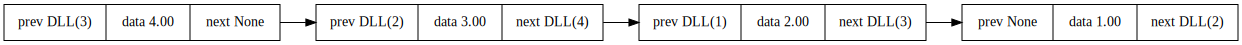

In [63]:
print_bacward_dlinked_list(tail)

### 2. Insertion

#### 2.1 Insertion at the beginning

In [64]:
def insert_dll_at_start(head, data):
    if head is None:
        return DLinkedList(data)
    
    new_node = DLinkedList(data)
    new_node.next = head
    head.prev = new_node
    head = new_node

    return head

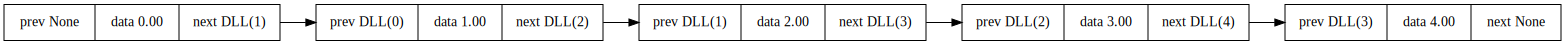

In [82]:
head = DLinkedList(1)
N = 5
cur = head
tail = None
for i in range(head.data + 1, N):
    new_node = DLinkedList(i)
    new_node.prev = cur
    cur.next = new_node
    cur = cur.next
    if i == N-1:
        tail = cur
head = insert_dll_at_start(head, 0)
print_forward_dlinked_list(head)

#### 2.2 Insertion at the end

In [83]:
def insert_dll_at_end(head, data):
    if head is None:
        return DLinkedList(data)

    cur = head
    while cur.next:
        cur = cur.next
    
    new_node = DLinkedList(data)
    cur.next = new_node
    new_node.prev = cur

    return head

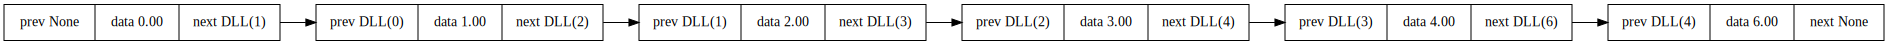

In [84]:
head = insert_dll_at_end(head, 6)
print_forward_dlinked_list(head)

#### 2.3 Insertion at the given position

In [103]:
def insert_dll_at_pos(head, data, pos):
    if pos < 1:
        print(f"Invaild position {pos}.")
        return head
    
    if pos == 1:
        return insert_dll_at_start(head, data)

    idx = 1
    cur = head
    while cur.next:
        if idx == pos:
            break
        cur = cur.next
        idx += 1

    if idx != pos:
        print(f"Invalid position {pos} for the list of length {idx}.")
        return head
    
    new_node = DLinkedList(data)
    new_node.prev = cur.prev
    new_node.next = cur
    cur.prev.next = new_node
    cur.prev = new_node
    return head

In [104]:
head = insert_dll_at_pos(head, 7, 6)
print_forward_dlinked_list(head)

In [105]:
head = insert_dll_at_pos(head, 8, 1)
print_forward_dlinked_list(head)

### 3. Deletion

#### 3.1 Delete the first node

In [106]:
def delete_dll_first(head):
    if head is None:
        print("Empty list, nothing to delete.")
        return head
    
    if head.next is None:
        del head
        return None
    
    head.next.prev = None
    new_head = head.next
    del head
    return new_head


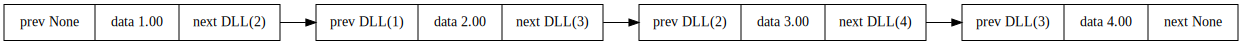

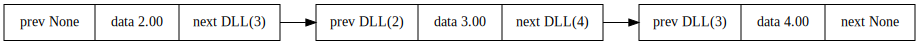

In [107]:
head = DLinkedList(1)
N = 5
cur = head
tail = None
for i in range(head.data + 1, N):
    new_node = DLinkedList(i)
    new_node.prev = cur
    cur.next = new_node
    cur = cur.next
    if i == N-1:
        tail = cur
print_forward_dlinked_list(head)
head = delete_dll_first(head)
print_forward_dlinked_list(head)

#### 3.2 Delete the last node

In [108]:
def delete_dll_last(head):
    if head is None:
        print("Empty list, nothing to delete.")
        return head
    
    if head.next is None:
        del head
        return None
    
    cur = head
    while cur.next:
        cur = cur.next

    cur.prev.next = None
    del cur
    return head

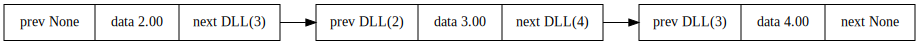

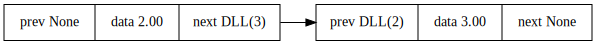

In [109]:
print_forward_dlinked_list(head)
head = delete_dll_last(head)
print_forward_dlinked_list(head)

#### 3.3 Delete the node at the given position

In [110]:
def delete_dll_at_pos(head, pos):
    if pos < 1:
        print(f"Invaild position {pos}.")
        return head
    
    if pos == 1:
        return delete_dll_first(head)

    idx = 1
    cur = head
    while cur.next:
        if idx == pos:
            break
        cur = cur.next
        idx += 1

    if idx != pos:
        print(f"Invalid position {pos} for the list of length {idx}.")
        return head
    
    cur.prev.next = cur.next
    if cur.next:
        cur.next.prev = cur.prev
    del cur
    
    return head

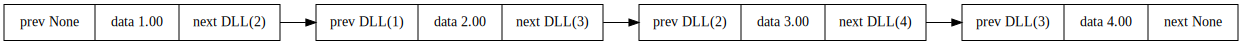

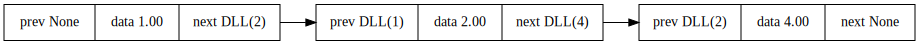

In [115]:
head = DLinkedList(1)
N = 5
cur = head
tail = None
for i in range(head.data + 1, N):
    new_node = DLinkedList(i)
    new_node.prev = cur
    cur.next = new_node
    cur = cur.next
    if i == N-1:
        tail = cur
print_forward_dlinked_list(head)
head = delete_dll_at_pos(head, 3)
print_forward_dlinked_list(head)

### 4. Search

In [121]:
def find_in_dll(head, data)-> bool:
    pos = 0
    while head.next:
        pos += 1
        if head.data == data:
            print(f"{data} found at position {pos}.")
            return True
        head= head.next
    print(f"{data} not found in the list.")
    return False

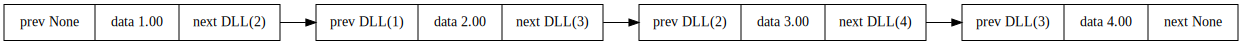

3 found at position 3.
6 not found in the list.


False

In [123]:
head = DLinkedList(1)
N = 5
cur = head
tail = None
for i in range(head.data + 1, N):
    new_node = DLinkedList(i)
    new_node.prev = cur
    cur.next = new_node
    cur = cur.next
    if i == N-1:
        tail = cur
print_forward_dlinked_list(head)
find_in_dll(head, 3)
find_in_dll(head, 6)

### 5. Length

In [127]:
def lenght_dll(head)-> int:
    len = 0
    while head:
        len += 1
        head= head.next
    return len

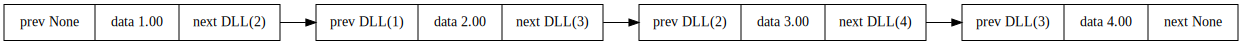

Length of the list is 4


In [128]:
print_forward_dlinked_list(head)
print(f"Length of the list is {lenght_dll(head)}")

## Circular Linked List

A circular linked list is a collection of nodes where each node has two parts: data and a reference to the next node. The last node has a reference to the first node. The first node is called the head and the last node is called the tail. If the list is empty then the head is a `None` reference.

### Implementation

In [129]:
class CLinkedList:
    def __init__(self, data) -> None:
        self.data = data
        self.next = None

    def __repr__(self) -> str:
        return f"CLL({self.data})"

In [152]:
# print doubly linked list inline in notebook using graphviz
def print_forward_clinked_list(head):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    node = head
    i = 0
    while True:
        dot.node(name=str(i), label= "{ data %.2f | next %s}" % (node.data, node.next), shape='record')
        if node.next:
            dot.edge(f'{i}', f'{i+1}')
        i += 1
        node = node.next
        if node == head:
            break

    display(dot)

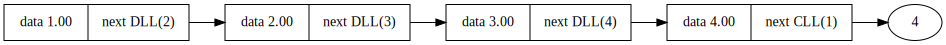

In [153]:
head = CLinkedList(1)
N = 5
cur = head
tail = None
for i in range(head.data + 1, N):
    new_node = DLinkedList(i)
    cur.next = new_node
    cur = cur.next
    if i == N-1:
        tail = cur
        tail.next = head
print_forward_clinked_list(head)